In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import utils as ut
from assets import Stock

In [5]:
s = Stock(name='FTS.TO', shares=150, price=49.50, dividend=3.64, annual_growth=5, volatility='med')
values, prices = s.compound(years=15)

In [6]:
s.summary()

The total value of FTS.TO is $17879.30
You have 210.0 shares at a price of $73.41.
You have $2462.16 in cash.


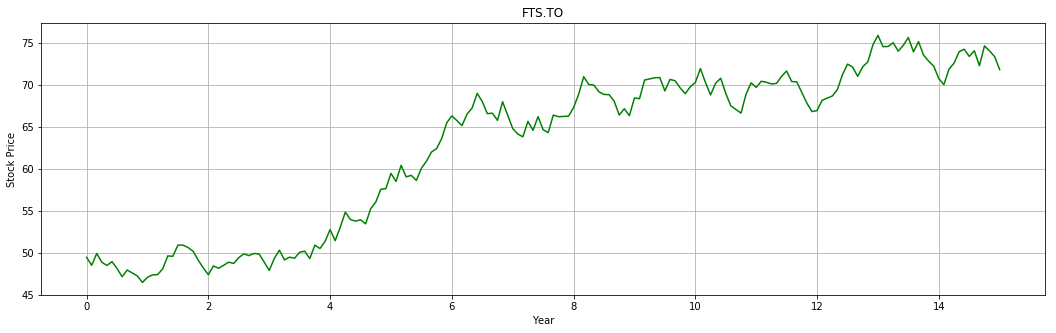

In [7]:
ut.plot_growth(prices, 'Stock Price', s.name)
plt.show()

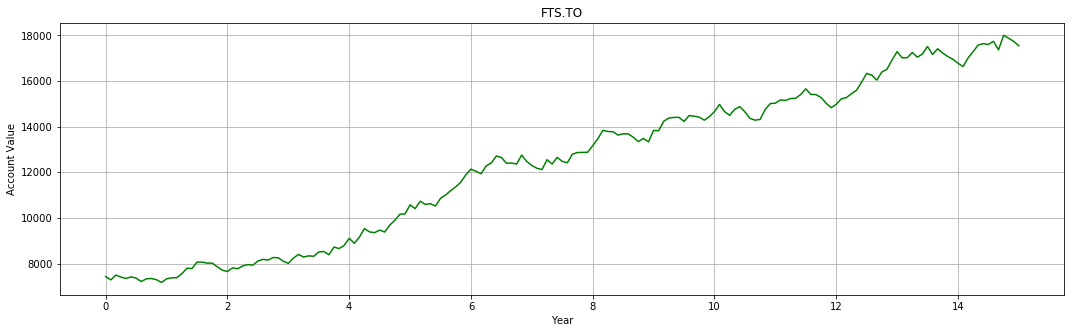

In [8]:
ut.plot_growth(values, 'Account Value', s.name)
plt.show()